# Measure Packet Loss

Packet loss, unlike download and upload speeds, is a measure where lower values are better. Even a small percentage of packet loss can significantly degrade the quality of a VoIP call or online gaming experience, for example.

We use decay function for it.
The exponential decay function is of the form:  

$P(p) = L \cdot e^{-k \cdot p}$

Where:
- \( P(p) \) is the percentage for a given ping \( p \).
- \( L \) is a scaling factor, typically set to the maximum value (e.g., 100 for percentages).
- \( k \) is a rate constant that determines how rapidly the percentage decreases with increasing ping.

## Create a general formula

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Core function

In [6]:
# Define the exponential decay function
def exponential_decay(p, L, k):
    return L * np.exp(-k * p)

k_values_packet_loss = [0.1, 0.2, 0.25, 0.3, 0.35]
p_loss_values = np.linspace(0, 20, 400)

### Plot

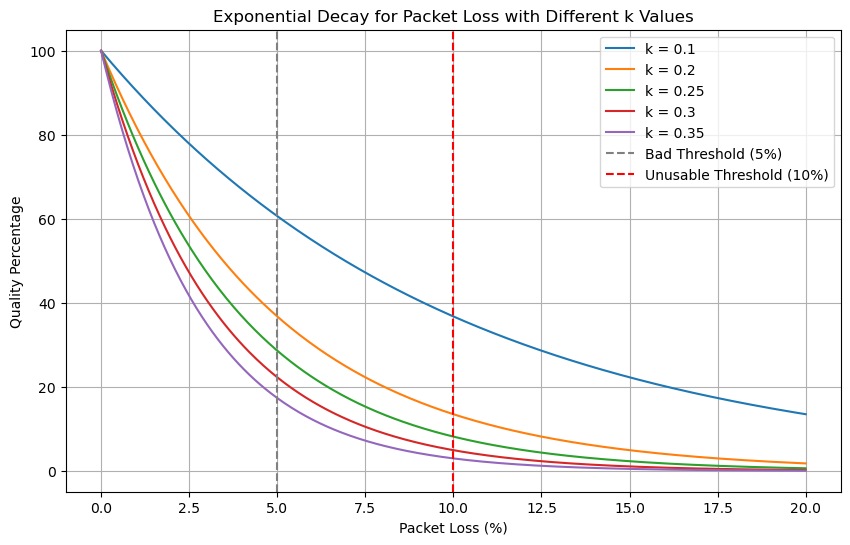

In [7]:
# Calculate and plot the exponential decay for various k values for packet loss
k_values_packet_loss = [0.1, 0.2, 0.25, 0.3, 0.35]
plt.figure(figsize=(10, 6))

for k in k_values_packet_loss:
    plt.plot(p_loss_values, exponential_decay(p_loss_values, 100, k), label=f'k = {k}')

plt.axvline(x=5, color='grey', linestyle='--', label='Bad Threshold (5%)')
plt.axvline(x=10, color='red', linestyle='--', label='Unusable Threshold (10%)')
plt.title('Exponential Decay for Packet Loss with Different k Values')
plt.xlabel('Packet Loss (%)')
plt.ylabel('Quality Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Find best params using machine learning
Find best params using machine learning.

- Packet loss of 1% or less is ideal and should correspond to around 100% quality.
- Packet loss of 5% is bad and should correspond to a significantly reduced quality.
- Packet loss above 10% is unusable and should be close to 0% quality.

\[
P(p) = L \times e^{-k \times p}
\]

Where:
- \( P(p) \) is the quality percentage for a given packet loss percentage \( p \).
- \( L \) is a scaling factor, typically set to the maximum value (e.g., 100 for percentages).
- \( k \) is a rate constant that determines how rapidly the quality percentage decreases with increasing packet loss.

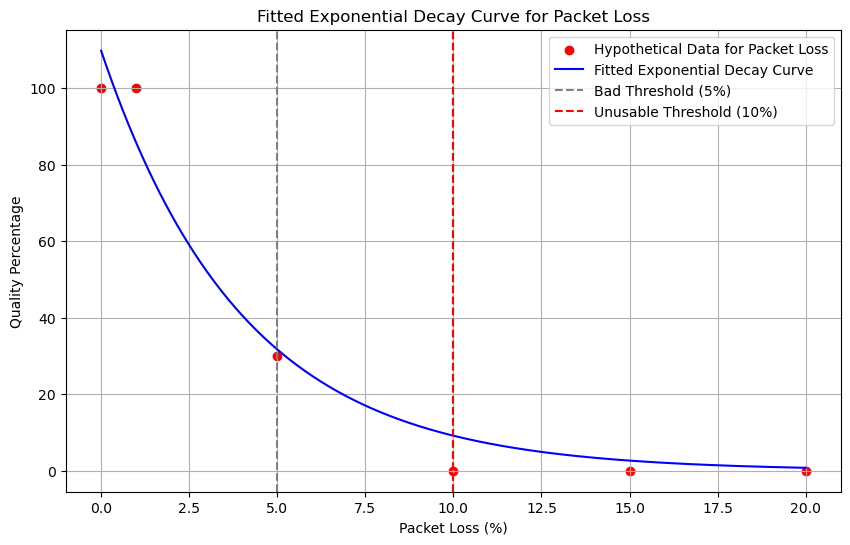

array([109.8432472,   0.2484516])

In [8]:
# Hypothetical dataset based on the provided specifications for packet loss
packet_loss = np.array([0, 1, 5, 10, 15, 20])
quality_percentages = np.array([100, 100, 30, 0, 0, 0])

# Fit the exponential decay function to the hypothetical packet loss data
packet_loss_params, packet_loss_covariance = curve_fit(exponential_decay, packet_loss, quality_percentages, bounds=(0, [110, 1]), p0=[100, 0.5])

# Predict using the fitted exponential decay function for a range of packet losses
p_loss_values = np.linspace(0, 20, 400)
predicted_quality_percentages = exponential_decay(p_loss_values, *packet_loss_params)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(packet_loss, quality_percentages, color='red', label='Hypothetical Data for Packet Loss')
plt.plot(p_loss_values, predicted_quality_percentages, label='Fitted Exponential Decay Curve', color='blue')
plt.axvline(x=5, color='grey', linestyle='--', label='Bad Threshold (5%)')
plt.axvline(x=10, color='red', linestyle='--', label='Unusable Threshold (10%)')
plt.title('Fitted Exponential Decay Curve for Packet Loss')
plt.xlabel('Packet Loss (%)')
plt.ylabel('Quality Percentage')
plt.legend()
plt.grid(True)
plt.show()

packet_loss_params

## Function for calculating the percentage

In [9]:
def calculate_packet_loss_percentage(p, L=109.84, k=0.2485):
    """Calculate the quality percentage P for a given packet loss percentage p using the exponential decay function."""
    return L * np.exp(-k * p)

# Test the function for a few values
test_packet_loss = [0, 1, 5, 10, 15, 20]
test_packet_loss_percentages = [calculate_packet_loss_percentage(p) for p in test_packet_loss]

test_packet_loss_percentages

[109.84,
 85.67188951413098,
 31.70659684058783,
 9.152478907607197,
 2.6419697634330395,
 0.7626353801365132]